<a href="https://colab.research.google.com/github/HariDharshini23/task3.ml/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 99% 64.0M/64.4M [00:03<00:00, 23.5MB/s]
100% 64.4M/64.4M [00:03<00:00, 17.3MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:

train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [ ]:

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
18/18 [==============================] - 9s 171ms/step - loss: 7.6120 - accuracy: 0.5296 - val_loss: 2.6637 - val_accuracy: 0.5286
Epoch 2/10
18/18 [==============================] - 4s 182ms/step - loss: 4.3000 - accuracy: 0.6463 - val_loss: 4.3999 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 4s 167ms/step - loss: 2.9204 - accuracy: 0.6930 - val_loss: 12.6177 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 4s 144ms/step - loss: 2.1450 - accuracy: 0.7792 - val_loss: 15.0548 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 4s 181ms/step - loss: 2.2586 - accuracy: 0.7953 - val_loss: 12.8868 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 5s 146ms/step - loss: 1.7077 - accuracy: 0.8169 - val_loss: 15.7161 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 4s 145ms/step - loss: 1.8756 - accuracy: 0.7899 - val_loss: 2.2108 - val_accuracy: 0.5571
Ep

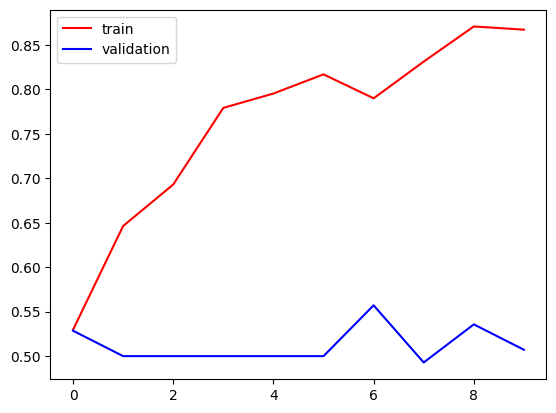

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

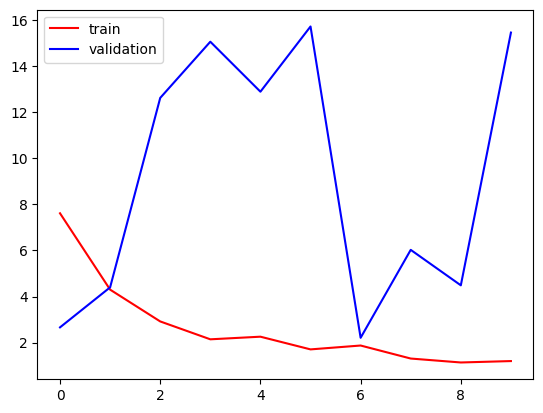

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/dog')

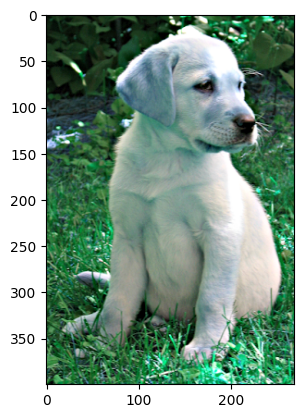

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(400, 268, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 529ms/step


array([[1.]], dtype=float32)